# Names

In [1]:
from prep_n_load import *
from nlp_helpers import tokenize_and_count

Sat May 29 11:50:26 2021  UTC
4978 parcels loaded.


## Ratio of parcels without a name

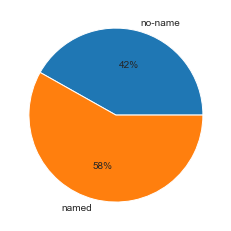

In [2]:
nonameratio = parcels[parcels.name.isna()].id.count() / parcels.shape[0]
_, ax = plt.subplots()
_= ax.pie([nonameratio, 1 - nonameratio], labels=["no-name", "named"], autopct="%1.0f%%")


## Often used words in parcel names

In [3]:
from collections import Counter
all_names = (p["name"] for p in parcels_json if p["name"] and len(p["name"]) > 1)
c = Counter()
for name in all_names:
    c.update(tokenize_and_count(name))
print(counter_to_string(c, 50))


  318: gallery
  137: mvb
   95: art
   55: tower
   48: pranksyland
   37: club
   34: house
   33: park
   33: bronx
   32: hq
   32: meta_vs
   30: nft
   29: temple
   28: center
   28: pp
   28: dcl
   27: plazas
   23: store
   23: tbd
   23: paraverse
   22: voxel
   22: studio
   22: zonte
   22: milan
   21: building
   21: shop
   21: museum
   20: tomato
   19: crypto
   19: north
   19: collection
   19: exhibition
   18: space
   18: artwall
   18: tokyo
   18: berlin
   17: garden
   17: beach
   16: portal
   16: blockchain
   16: group
   15: hub
   15: plaza
   15: neutron
   14: science
   14: lounge
   14: cryptoart
   14: meta
   14: coldie
   14: bazaar


* MVB = Metaverse billboards

## Top used words per island

In [6]:
for island_name, row in (
    parcels[~parcels.name.isna()]
    .groupby("island")["name"]
    .apply(" ".join)
    .to_frame()
    .iterrows()
):
    print(island_name)
    print(counter_to_string(tokenize_and_count(row["name"])))
    print()

Berlin
   25: gallery
   17: berlin
   11: m0na
    9: magall
    8: ebc
    8: blockchain
    8: global
    8: solution
    8: group
    7: art

Ceres
    8: ceres
    6: gallery
    4: wei
    4: lounge
    3: mezzanine
    2: voxel
    2: market
    2: synoptic
    2: galactical
    2: vision

Electron
    4: electron
    3: paraverse
    2: hall
    1: pixls
    1: pride
    1: gallery
    1: mvb
    1: rooftop
    1: apartment
    1: central

Euro
    6: euro
    4: tower
    1: 205
    1: mvb
    1: onchainradio
    1: unit
    1: w6design
    1: bittrees
    1: portal
    1: 206

Far Far Away
   12: school
   12: data
   12: science
    7: far
    4: away
    4: gallery
    2: uncle
    2: bitcoin
    2: lounge
    2: bodega

Helios
   22: gallery
    8: art
    6: nemausa
    6: corner
    5: helios
    5: pit
    5: concert
    5: venue
    4: helio
    4: row

Little Ceres
    1: accelerate
    1: art
    1: ceres

Milan
   40: gallery
   22: milan
    8: nft
    8: art
    8

* The people in Bronx sure like their island name.